In [22]:
import gym
from gym import spaces
import numpy as np
import time
import matplotlib.pyplot as plt
import time

# PART I

The environment that we defined is called the "GameEnv". It is a 4x4 grid world where the agent moves around to collect rewards, avoid pitfalls, and reach the goal to collect a final reward.

**Actions**

The agent has 4 possible actions:

- Move right
- Move left
- Move up
- Move down

**States**

The states are represented by a 4x4 grid where each cell can have one of the following values:

+ 1 if the agent is present in that cell
+ 0.8 if the cell contains the target goal position
+ 0.6 if the cell contains a gold coin
+ 0.2 if the cell contains a pitfall

**Rewards**

The agent receives different rewards based on the state it moves to after taking an action:

- +10 if the agent reaches the target goal position
- +5 if the agent reaches the gold coin 
- -6 if the agent enters the pitfall

**Objective**

The main objective of the agent is to navigate through the grid world and reach the target goal position while collecting the largest possible reward.


In [23]:
import numpy as np
import gym
from gym import spaces


class GameEnv(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self):
        self.action_space = spaces.Discrete(4) 
        self.observation_space = spaces.Discrete(16)  
        self.max_timesteps = 20
        
        
    def step(self, action):

        self.state = np.random.choice(self.observation_space.n)
        done = False # initialize done to False
        if action == 0:
            self.agent_pos[0] += 1  #down
        if action == 1:
            self.agent_pos[0] -= 1  #up
        if action == 2:
            self.agent_pos[1] += 1  #right
        if action == 3:
            self.agent_pos[1] -= 1  #left

        self.agent_pos = np.clip(self.agent_pos, 0, 3)
        self.state = np.zeros((4,4))     
        self.state[tuple(self.agent_pos)] = 1.0
        self.state[tuple(self.goal_pos)] = 0.8
        self.state[tuple(self.coin1_pos)] = 0.6
        self.state[tuple(self.coin2_pos)] = 0.6
        self.state[tuple(self.pit1_pos)] = 0.2
        self.state[tuple(self.pit2_pos)] = 0.2
        observation = self.state.flatten()
        
        reward = 0
        if (self.agent_pos == self.goal_pos).all():
            reward = 10 #Target position: Given max reward if it reaches target
            done = True   #stops the agent from continuing to move (terminal state)
            print("\nTerminal State reached!\n")

        elif (self.agent_pos == self.pit1_pos).all():
            reward = -6 #A negative reward of -6 if it enters pitfall

        elif (self.agent_pos == self.pit2_pos).all():
            reward = -6 #A negative reward of -6 if it enters pitfall
            
        elif (self.agent_pos == self.coin1_pos).all():
            reward = +5 #A reward of +5
            
        elif (self.agent_pos == self.coin2_pos).all():
            reward = +5 #A reward of +5

            
        self.timestep += 1
        if self.timestep >= self.max_timesteps:
            done = True
        info = {}
        return observation, reward, done, info
    


    def reset(self):
        
        self.timestep = 0
        self.state = np.zeros((4,4))
        self.agent_pos = [0,0]
        self.goal_pos = [3,3]       
        self.pit1_pos = [2,0]
        self.pit2_pos = [2,3]
        self.coin1_pos = [1,1]
        self.coin2_pos = [1,3] 

        
        self.state[tuple(self.agent_pos)] = 1.0
        self.state[tuple(self.goal_pos)] = 0.8
        self.state[tuple(self.coin1_pos)] = 0.6
        self.state[tuple(self.coin2_pos)] = 0.6
        self.state[tuple(self.pit1_pos)] = 0.2
        self.state[tuple(self.pit2_pos)] = 0.2
        observation = self.state.flatten()
        return observation

    def render(self):
        plt.imshow(self.state)
       

In [24]:
class RandomAgent:
    def __init__(self, env):
        self.env = env
        self.observation_space = env.observation_space
        self.action_space = env.action_space
    
    def step(self, observation):
        return np.random.choice(self.action_space.n)

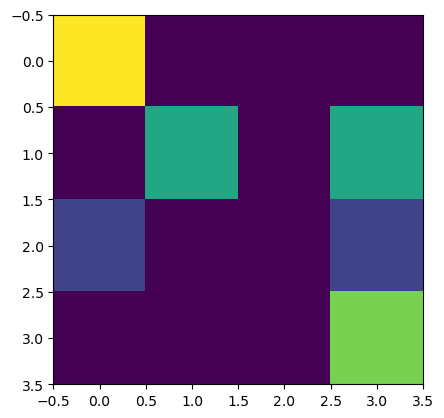

In [25]:
envview = GameEnv()
envview.reset()
envview.render()

Step 1
Chosen action:  1 (Up)
Obs:  [1.  0.  0.  0.  0.  0.6 0.  0.6 0.2 0.  0.  0.2 0.  0.  0.  0.8]
Reward:  0 

Step 2
Chosen action:  2 (Right)
Obs:  [1.  0.  0.  0.  0.  0.6 0.  0.6 0.2 0.  0.  0.2 0.  0.  0.  0.8]
Reward:  0 

Step 3
Chosen action:  1 (Up)
Obs:  [1.  0.  0.  0.  0.  0.6 0.  0.6 0.2 0.  0.  0.2 0.  0.  0.  0.8]
Reward:  0 

Step 4
Chosen action:  2 (Right)
Obs:  [1.  0.  0.  0.  0.  0.6 0.  0.6 0.2 0.  0.  0.2 0.  0.  0.  0.8]
Reward:  0 

Step 5
Chosen action:  2 (Right)
Obs:  [1.  0.  0.  0.  0.  0.6 0.  0.6 0.2 0.  0.  0.2 0.  0.  0.  0.8]
Reward:  0 

Step 6
Chosen action:  3 (Left)
Obs:  [1.  0.  0.  0.  0.  0.6 0.  0.6 0.2 0.  0.  0.2 0.  0.  0.  0.8]
Reward:  0 

Step 7
Chosen action:  2 (Right)
Obs:  [1.  0.  0.  0.  0.  0.6 0.  0.6 0.2 0.  0.  0.2 0.  0.  0.  0.8]
Reward:  0 

Step 8
Chosen action:  2 (Right)
Obs:  [1.  0.  0.  0.  0.  0.6 0.  0.6 0.2 0.  0.  0.2 0.  0.  0.  0.8]
Reward:  0 

Step 9
Chosen action:  2 (Right)
Obs:  [1.  0.  0.  0.  0.  0.6

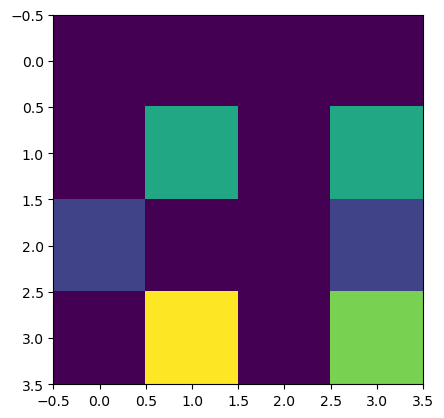

In [30]:
envtest = GameEnv()
envtest.reset()

agent = RandomAgent(envtest)

obs = envtest.reset()
done = False
step_labels={0: "(Down)", 1:"(Up)", 2: "(Right)", 3:"(Left)"}

rwd=0
step=0
while not done:
    step=step+1
    print("Step",step)
    action = agent.step(obs)
    print("Chosen action: ", action, step_labels[action])
    observation, reward, done, info = envtest.step(action)
    rwd+=reward
    print("Obs: ", obs)
    print("Reward: ", reward,'\n')
    envtest.render()
    
print("Total Reward:", rwd)


<class 'numpy.ndarray'> [1.  0.  0.  0.  0.  0.6 0.  0.6 0.2 0.  0.  0.2 0.  0.  0.  0.8]


IndexError: arrays used as indices must be of integer (or boolean) type

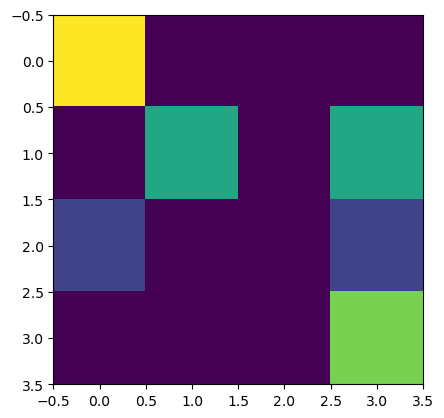

In [33]:
#https://www.geeksforgeeks.org/sarsa-reinforcement-learning/#

env = GameEnv()
epsilon = 0.9
total_episodes = 10000
max_steps = 100
alpha = 0.85
gamma = 0.95
 
#Initializing the Q-matrix
Q = np.zeros((env.observation_space.n, env.action_space.n))

def choose_action(state):
    action=0
    if np.random.uniform(0, 1) < epsilon:
        action = np.random.choice(env.action_space.n)
    else:
        action = np.argmax(Q[state, :])
    return action

def update(state, state2, reward, action, action2):
    predict = Q[state, action]
    target = reward + gamma * Q[state2, action2]
    Q[state, action] = Q[state, action] + alpha * (target - predict)
    
#Initializing the reward
reward=0
 
# Starting the SARSA learning
for episode in range(total_episodes):
    t = 0
    state1 = env.reset()
    print(type(state1), state1)
    action1 = choose_action(state1)
 
    while t < max_steps:
        #Visualizing the training
        env.render()
         
        #Getting the next state
        state2, reward, done, info= env.step(action1)
 
        #Choosing the next action
        action2 = choose_action(state2)
         
        #Learning the Q-value
        update(state1, state2, reward, action1, action2)
 
        state1 = state2
        action1 = action2
         
        #Updating the respective vaLues
        t += 1
        reward += 1
         
        #If at the end of learning process
        if done:
            break
